In [1]:
%matplotlib inline
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns; sns.set()

In [3]:
Training = pd.read_csv('/Users/Arnaud/Desktop/ChallengeML/training_input.csv', delimiter=',')
Output = pd.read_csv('/Users/Arnaud/Desktop/ChallengeML/training_output.csv', delimiter=';')

In [4]:
Training = pd.merge(Training, Output, on ='ID')

In [5]:
Training.shape

(613220, 58)

In [6]:
TestFull = Training.drop(pd.isnull(Training).any(1).nonzero()[0]).reset_index(drop = True)

In [7]:
print TestFull.shape
print TestFull.columns.values

(513947, 58)
['ID' 'date' 'product_id' '09:30:00' '09:35:00' '09:40:00' '09:45:00'
 '09:50:00' '09:55:00' '10:00:00' '10:05:00' '10:10:00' '10:15:00'
 '10:20:00' '10:25:00' '10:30:00' '10:35:00' '10:40:00' '10:45:00'
 '10:50:00' '10:55:00' '11:00:00' '11:05:00' '11:10:00' '11:15:00'
 '11:20:00' '11:25:00' '11:30:00' '11:35:00' '11:40:00' '11:45:00'
 '11:50:00' '11:55:00' '12:00:00' '12:05:00' '12:10:00' '12:15:00'
 '12:20:00' '12:25:00' '12:30:00' '12:35:00' '12:40:00' '12:45:00'
 '12:50:00' '12:55:00' '13:00:00' '13:05:00' '13:10:00' '13:15:00'
 '13:20:00' '13:25:00' '13:30:00' '13:35:00' '13:40:00' '13:45:00'
 '13:50:00' '13:55:00' 'TARGET']


In [8]:
del TestFull['ID'], TestFull['date'], TestFull['product_id']

In [9]:
TestFull.mean(axis=0)

09:30:00     6079961.685724
09:35:00     2973521.486158
09:40:00     2763798.900231
09:45:00     2655015.216648
09:50:00     2533070.448137
09:55:00     2357192.940235
10:00:00     2681334.580605
10:05:00     2406479.177236
10:10:00     2242428.031503
10:15:00     2156953.036417
10:20:00     2067224.317770
10:25:00     1948895.885916
10:30:00     2042904.725377
10:35:00     1909479.931295
10:40:00     1835468.205290
10:45:00     1783736.036156
10:50:00     1720167.190118
10:55:00     1649102.712842
11:00:00     1689200.926634
11:05:00     1635597.916463
11:10:00     1568781.653684
11:15:00     1542924.013695
11:20:00     1511988.909707
11:25:00     1473255.501487
11:30:00     1512439.561299
11:35:00     1425821.951436
11:40:00     1366365.319374
11:45:00     1353005.860924
11:50:00     1316127.832850
11:55:00     1284786.076683
12:00:00     1326876.627343
12:05:00     1256642.770931
12:10:00     1207727.930910
12:15:00     1182673.881999
12:20:00     1165357.636279
12:25:00     1137866

In [92]:
TestFull = TestFull[['10:00:00','10:10:00','13:55:00','13:50:00','10:20:00','09:50:00','09:40:00','TARGET']]


In [62]:
for i in range(1,TestFull.columns.shape[0]-1):

    TestFull["diff{0}".format(i)]=TestFull.iloc[:,i]-TestFull.iloc[:,i-1]

In [10]:
features = TestFull.drop(['TARGET'], axis=1)
X_columns = TestFull.columns.drop(['TARGET'])
X = features.values
y = TestFull['TARGET'].values

In [11]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [12]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

n_estimators = 20
max_depth = 20
max_features = 7
reg = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)

scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='mean_squared_error',n_jobs=3)
print("log RMSE: {:.4f} +/-{:.4f}".format(
    np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))

log RMSE: 34601399.4286 +/-1488717.4959
CPU times: user 195 ms, sys: 296 ms, total: 491 ms
Wall time: 2min 22s


In [13]:
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=7, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

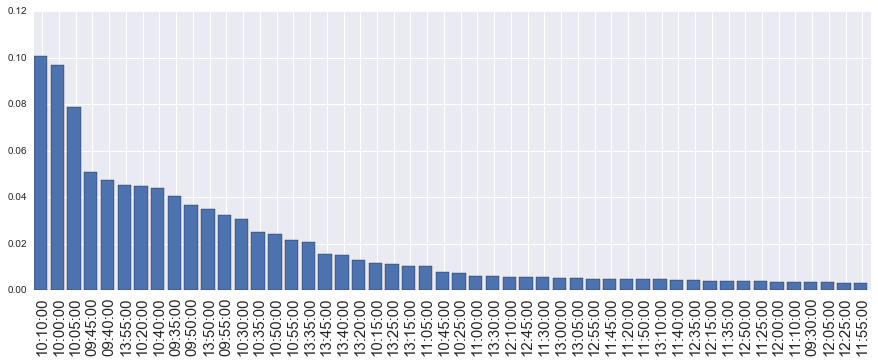

In [14]:
plt.figure(figsize=(15, 5))

ordering = np.argsort(reg.feature_importances_)[::-1][:50]

importances = reg.feature_importances_[ordering]
feature_names = X_columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);

In [17]:
feature_names

Index([u'10:10:00', u'10:00:00', u'10:05:00', u'09:45:00', u'09:40:00',
       u'13:55:00', u'10:20:00', u'10:40:00', u'09:35:00', u'09:50:00',
       u'13:50:00', u'09:55:00', u'10:30:00', u'10:35:00', u'10:50:00',
       u'10:55:00', u'13:35:00', u'13:45:00', u'13:40:00', u'13:20:00',
       u'10:15:00', u'13:25:00', u'13:15:00', u'11:05:00', u'10:45:00',
       u'10:25:00', u'11:00:00', u'13:30:00', u'12:10:00', u'12:45:00',
       u'11:30:00', u'13:00:00', u'13:05:00', u'12:55:00', u'11:45:00',
       u'11:20:00', u'11:50:00', u'13:10:00', u'11:40:00', u'12:35:00',
       u'12:15:00', u'11:35:00', u'12:50:00', u'11:25:00', u'12:00:00',
       u'11:10:00', u'09:30:00', u'12:05:00', u'12:25:00', u'11:55:00'],
      dtype='object')